In [70]:
# import packages
import numpy as np
import pandas as pd
import math 
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)  # None means no limit
pd.set_option('display.max_rows', None) 


# import data
df = pd.read_csv('../Data/large_validation.csv')
selected_columns = ['water', 'map_temperature', 'map_HZ', 'map_star_age', 'C12_stability', 'HUI_PROSTOI', 'HUI_NEPROSTOI', 'HUI_SLOJNIY', 'PHI', 'ESI']
data = df[selected_columns]
#display data
#print(data)
print(data.shape[1])

10


1. COMPARE DESCRIPTIVE STATISTICS

In [71]:
descriptive_stats = df.describe()
# print(descriptive_stats)

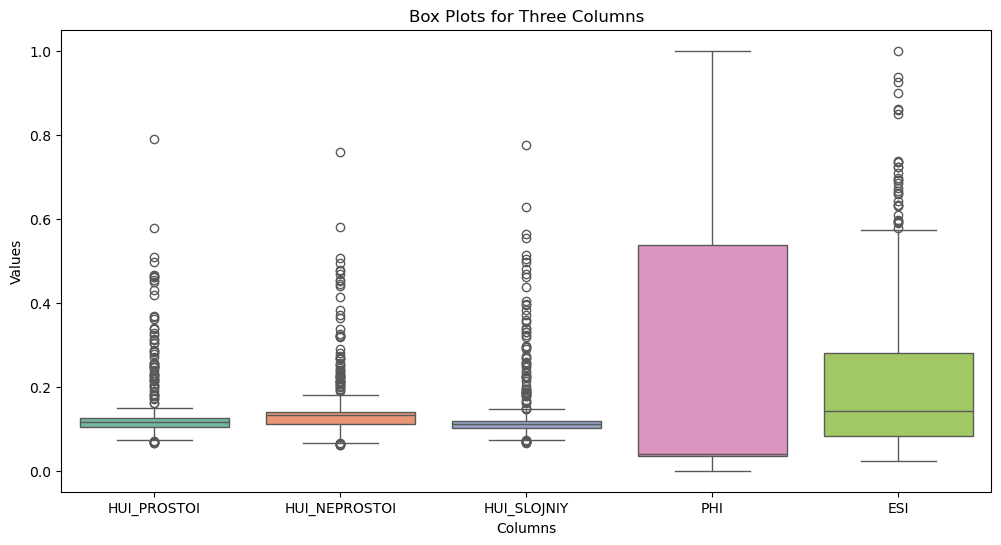

In [72]:
indices_col = ['HUI_PROSTOI', 'HUI_NEPROSTOI', 'HUI_SLOJNIY', 'PHI', 'ESI']
i_df = df[indices_col]

plt.figure(figsize=(12, 6))
sns.boxplot(data=i_df, palette="Set2")

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plots for Three Columns')

# Display the plot
plt.show()

2. COMPARE CORRELATION

                HUI_PROSTOI  HUI_NEPROSTOI   HUI_SLOJNIY           PHI  \
HUI_PROSTOI             NaN   0.000000e+00  0.000000e+00  6.418201e-20   
HUI_NEPROSTOI  0.000000e+00            NaN  0.000000e+00  3.562736e-22   
HUI_SLOJNIY    0.000000e+00   0.000000e+00           NaN  6.366181e-21   
PHI            6.418201e-20   3.562736e-22  6.366181e-21           NaN   
ESI            9.192696e-87   2.954355e-84  5.106998e-91  7.230368e-66   

                        ESI  
HUI_PROSTOI    9.192696e-87  
HUI_NEPROSTOI  2.954355e-84  
HUI_SLOJNIY    5.106998e-91  
PHI            7.230368e-66  
ESI                     NaN  


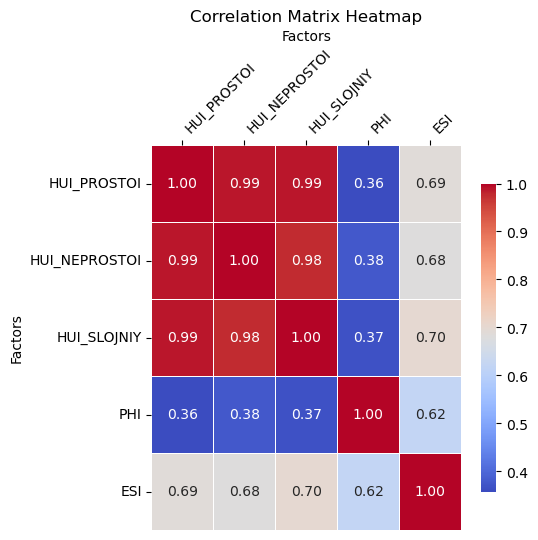

               HUI_PROSTOI  HUI_NEPROSTOI  HUI_SLOJNIY       PHI       ESI
HUI_PROSTOI       1.000000       0.987845     0.988111  0.358053  0.687747
HUI_NEPROSTOI     0.987845       1.000000     0.976011  0.377886  0.680389
HUI_SLOJNIY       0.988111       0.976011     1.000000  0.367048  0.699754
PHI               0.358053       0.377886     0.367048  1.000000  0.618868
ESI               0.687747       0.680389     0.699754  0.618868  1.000000


In [73]:
import scipy.stats as stats
from scipy.special import betainc

numeric_data_cor = i_df.select_dtypes(include=[np.number])
correlation_matrix = i_df.corr()

def calculate_p_value(r,n):
    df = n - 2
    t_squared = r**2 * (df/(1-r**2))
    p_value = betainc(0.5 * df, 0.5, df/(df + t_squared))
    return p_value


p_values = pd.DataFrame(np.zeros((numeric_data_cor.shape[1], numeric_data_cor.shape[1])), columns=numeric_data_cor.columns, index=numeric_data_cor.columns)

for col1 in numeric_data_cor.columns:
    for col2 in numeric_data_cor.columns:
        if col1 != col2:
            # Calculate Pearson correlation
            r = correlation_matrix.loc[col1, col2]
            # Number of observations
            n = numeric_data_cor.shape[0]
            # Calculate p-value
            p_val = calculate_p_value(r, n)
            p_values.loc[col1, col2] = p_val
        else:
            p_values.loc[col1, col2] = np.nan  # or 1, since a variable is perfectly correlated with itself


print(p_values)
plt.figure(figsize=(5, 5))  # Set the size of the plot
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
heatmap.xaxis.set_ticks_position('top')
heatmap.xaxis.set_label_position('top')  # Move the x-axis label to the top
plt.xticks(rotation=45, ha='left') 

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Factors')
plt.ylabel('Factors')

# Display the plot
plt.show()
print(correlation_matrix)

3. Principal Component Analysis (PCA) ??? THIS MIGHT HAVE TO BE DONE FOR PARTS OF THE INDEX. READ!!!

Explained Variance Ratio:
[0.46128108 0.24279266 0.15814544 0.12023255 0.01754826]

Cumulative Explained Variance:
[0.46128108 0.70407375 0.86221919 0.98245174 1.        ]

Loading Scores:
                      PC1       PC2       PC3       PC4       PC5
water            0.336913 -0.360361  0.814438 -0.305344  0.009235
map_temperature  0.604663 -0.152279 -0.326540 -0.002595  0.710323
map_HZ           0.365733  0.495802  0.335240  0.711125 -0.048331
C12_stability    0.600480 -0.152662 -0.341405 -0.089099 -0.701158
map_star_age     0.162899  0.760149  0.033460 -0.626993  0.037385


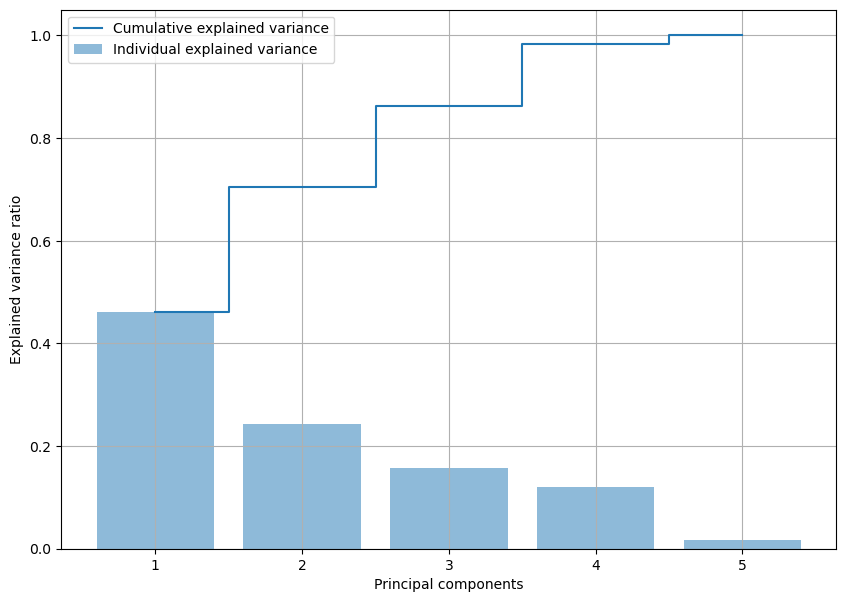

In [74]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Example DataFrame

df = pd.DataFrame(data)

# Separate the features and the target variable
features = ['water', 'map_temperature', 'map_HZ', 'C12_stability', 'map_star_age']
X = df[features]
y = df['HUI_SLOJNIY']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with principal components
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

print("Explained Variance Ratio:")
print(explained_variance)
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

# Loading scores
loading_scores = pd.DataFrame(pca.components_.T, index=features, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print("\nLoading Scores:")
print(loading_scores)

# Plot the explained variance
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.grid()
plt.show()


Explained Variance Ratio:
[0.46128108 0.24279266 0.15814544 0.12023255 0.01754826]

Cumulative Explained Variance:
[0.46128108 0.70407375 0.86221919 0.98245174 1.        ]

Loading Scores:
                      PC1       PC2       PC3       PC4       PC5
water            0.336913 -0.360361  0.814438 -0.305344  0.009235
map_temperature  0.604663 -0.152279 -0.326540 -0.002595  0.710323
map_HZ           0.365733  0.495802  0.335240  0.711125 -0.048331
C12_stability    0.600480 -0.152662 -0.341405 -0.089099 -0.701158
map_star_age     0.162899  0.760149  0.033460 -0.626993  0.037385


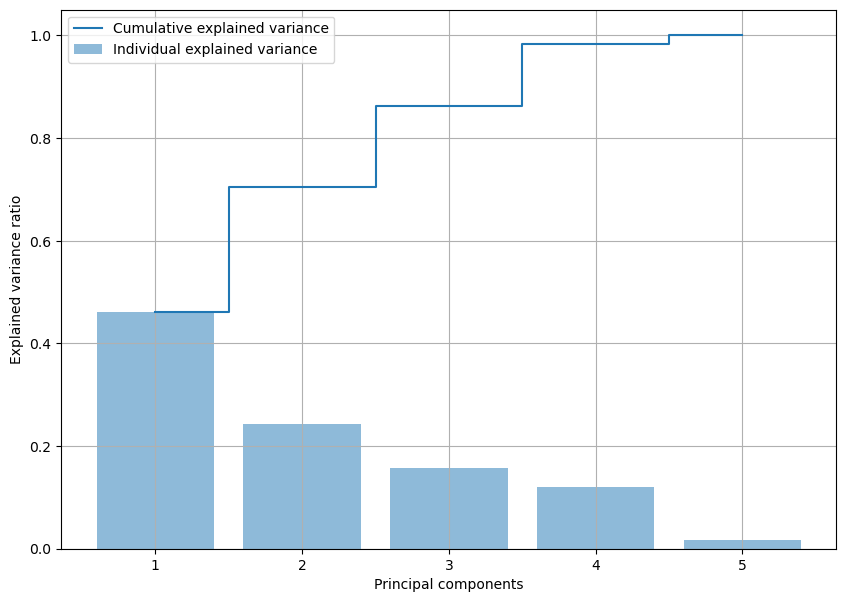

<Figure size 1000x700 with 0 Axes>

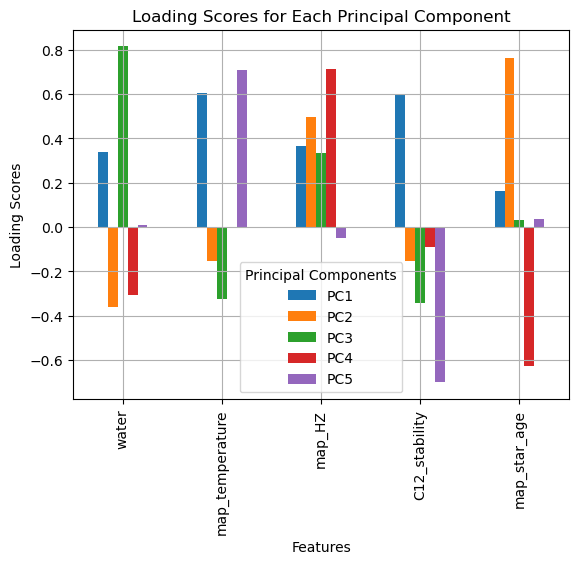

In [75]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Example DataFrame


df = pd.DataFrame(data)

# Separate the features and the target variable
features = ['water', 'map_temperature', 'map_HZ', 'C12_stability', 'map_star_age']
X = df[features]
y = df['HUI_SLOJNIY']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with principal components
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

print("Explained Variance Ratio:")
print(explained_variance)
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

# Loading scores
loading_scores = pd.DataFrame(pca.components_.T, index=features, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print("\nLoading Scores:")
print(loading_scores)

# Plot the explained variance
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.grid()
plt.show()

# Visualize Loading Scores
plt.figure(figsize=(10, 7))
loading_scores.plot(kind='bar')
plt.title('Loading Scores for Each Principal Component')
plt.xlabel('Features')
plt.ylabel('Loading Scores')
plt.legend(title='Principal Components')
plt.grid()
plt.show()


4. ERROR METRICS - READ HOW TO INTERPRET

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
mae = mean_absolute_error(i_df['HUI_SLOJNIY'], i_df['ESI'])
mse = mean_squared_error(i_df['HUI_SLOJNIY'], i_df['ESI'])
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.10729890281664375
Mean Squared Error: 0.024828514876641224


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
mae = mean_absolute_error(i_df['HUI_SLOJNIY'], i_df['PHI'])
mse = mean_squared_error(i_df['HUI_SLOJNIY'], i_df['PHI'])
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.2233542181889174
Mean Squared Error: 0.08624608714553764


5. CONSISTENCY STABILITY AND VOLATILITY ANALYSIS - READ HOW TO INTERPRET

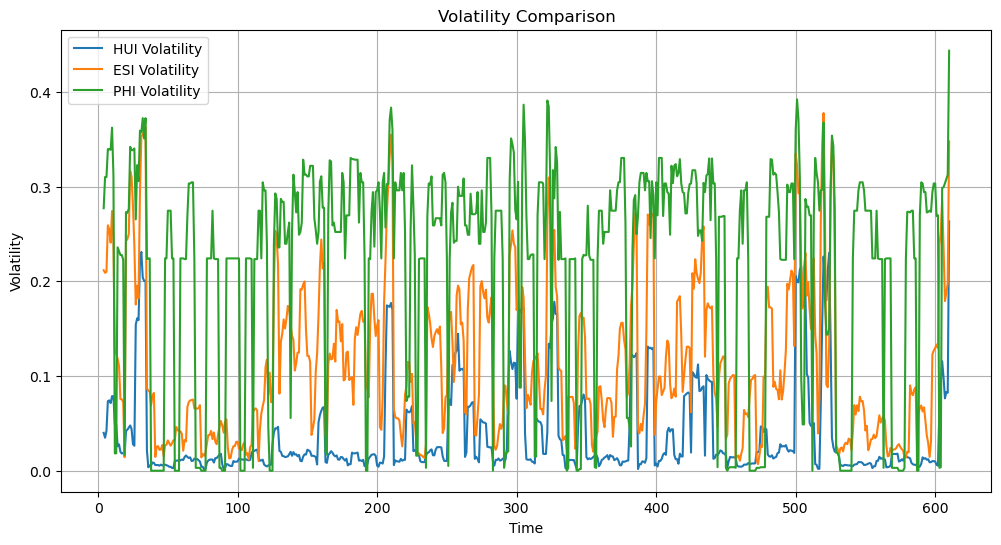

In [81]:
i_df['HUI_volatility'] = i_df['HUI_SLOJNIY'].rolling(window=5).std()
i_df['ESI_volatility'] = i_df['ESI'].rolling(window=5).std()
i_df['PHI_volatility'] = i_df['PHI'].rolling(window=5).std()

plt.figure(figsize=(12, 6))
plt.plot(i_df['HUI_volatility'], label='HUI Volatility')
plt.plot(i_df['ESI_volatility'], label='ESI Volatility')
plt.plot(i_df['PHI_volatility'], label='PHI Volatility')
plt.title('Volatility Comparison')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()